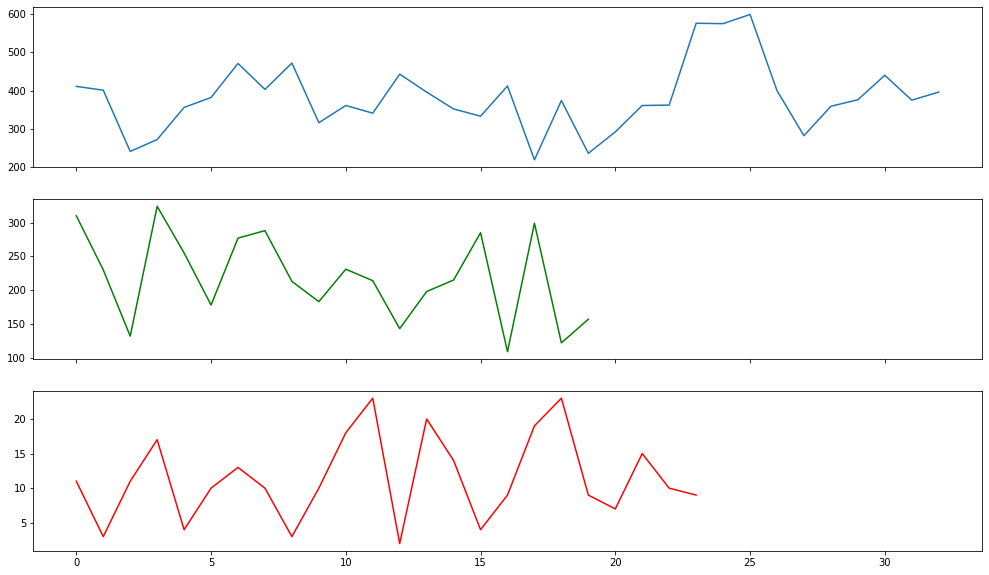


 Mean values:
 Confirmed daily          358.225
Recovered                246.500
Official deaths daily     13.600
dtype: float64

 Mean values:
 Confirmed daily          418.2
Recovered                207.9
Official deaths daily     13.0
dtype: float64


[576.0, 575.0, 599.0, 400.0, 282.0, 359.0, 376.0, 440, 375, 396]

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv("covid19.csv")
data = data.fillna(0)
data = data.drop(["Source","Unofficial deaths daily"], axis = 1)
data_train = data[["Confirmed daily", "Recovered", "Official deaths daily"]]
data_train = data_train.iloc[-40:,:]

R_obs_w = list(data_train["Confirmed daily"]) + [440, 375, 396]
O_obs_w = list(data_train["Recovered"]) + [299, 122, 157]
Z_obs_w = list(data_train["Official deaths daily"]) + [15,10, 9] # łącznie z 14 czerwca
O_obs_w = O_obs_w[23:]
R_obs_w = R_obs_w[10:]
Z_obs_w= Z_obs_w[19:]
fig, axes = plt.subplots(3,1, sharex=True, figsize=(17, 10))
axes[0].plot(range(len(R_obs_w)), R_obs_w )
axes[1].plot(range(len(O_obs_w)), O_obs_w ,"g")
axes[2].plot(range(len(Z_obs_w)), Z_obs_w, "r" )
plt.show()

print("\n Mean values:\n",data_train.mean())
print("\n Mean values:\n",data_train.iloc[-10:,:].mean())

R_obs_w[-10:]

In [4]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model_STE_R = ExponentialSmoothing(R_obs_w, trend = "add", seasonal = "add", seasonal_periods = 7).fit()

model_STE_Z = ExponentialSmoothing(Z_obs_w, trend = "add", seasonal = "add", seasonal_periods = 7).fit()

model_STE_O = ExponentialSmoothing(O_obs_w, trend = "add", seasonal = "add", seasonal_periods = 7).fit()

/home/jan/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/jan/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/jan/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [8]:
# R forecast
koniec = 20
future = 30


R_forecast = model_STE_R.forecast(1)
Z_forecast = model_STE_Z.forecast(1)
O_forecast = model_STE_O.forecast(1)
print(R_forecast, Z_forecast, O_forecast)

[383.13242227] [21.21167703] [227.33937714]
